In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# (1) Data


In [2]:
class MyData:
    def __init__(self):
        self.dir = "./step1_data/point.csv"
    
    def get_point(self):
        point = np.genfromtxt(self.dir, delimiter = ',')
        return point

data = MyData()
points = data.get_point()

x = points[0]
y = points[1]
print(x.shape, y.shape)

(100,) (100,)


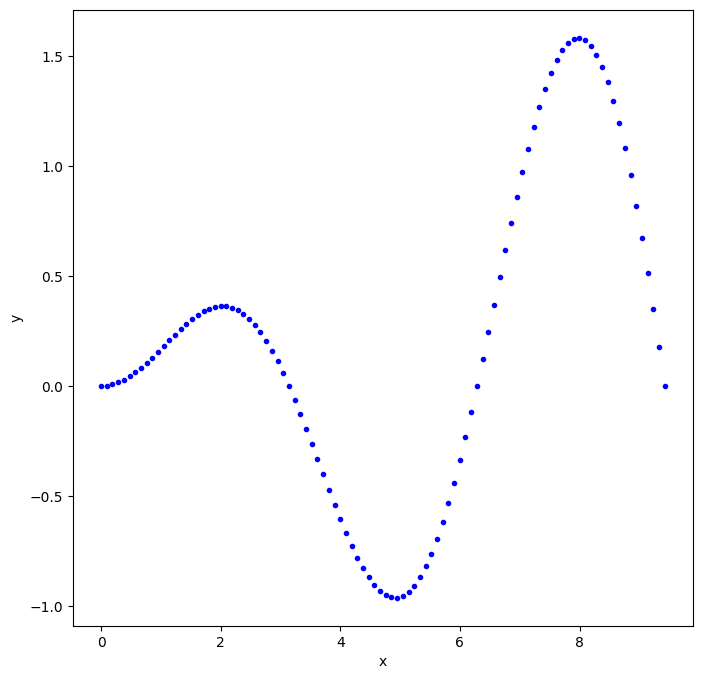

In [3]:
class MyPlot:
    def __init__(self):
        self.figsize = (8,8)
    
    def plot_point(self, x, y, y2 = None):
        plt.figure(figsize = self.figsize)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(x, y, marker = '.', color = 'b')
        if y2 is not None:
            plt.plot(x, y2, color = 'r')

plot = MyPlot()
plot.plot_point(x, y)

# Model

## Parameter and explain definition

(1) feature:
    머신러닝에 자주 등장하는 용어이다. feature이란 말그대로 데이터의 특징이다.
    우리는 머신러닝을 위해 데이터를 처리하고 가공하는데 많은 시간을 써야한다.
    고전적인 머신러닝기법과 딥러닝 기법의 가장 큰 차이는 이 feature에 존재한다.
    딥러닝에서는 feature을 스스로 찾아 학습하는 반면, 머신러닝에서는 feature을
    수동으로 구성해야한다. 우선 딥러닝에서 feature을 찾는 방식은 다음에 소개하도록 한다.
    get_feature() 함수를 통해 우리는 feature_matrix를 구성한다. 주어진 데이터 포인트는 x, y이고, 우리는 주어진 x의 데이터와 기울기를 이용하여 y에 가장 가까운
    예측값 y_hat을 찾는것이 목표이다.
    이때 주어진 x는 1차원 벡터인데, 이를 그대로 사용한다면 y = ax + b의 일차 직선.
    만약 우리가 x에 대해서 좀더 확장하여 사용한다면 비선형적 곡선까지도 학습할 수 있다.
    이때 사용한것이 p(차수)이다. x의 차수를 높이게 된다면, 부드러운 곡선까지 학습 할 수있다. 그럼 x는 100개의 요소를 가진 1차원 데이터인데, 이를 확장하려면 모든 x에 대해
    차수를 높인 행렬이 필요하다. 여기까지가 데이터 가공이다.

(2) find_weight:
    y = ax + b의 직선을 생각하자. 이 직선은 기울기에 따라서 정답에 가까워질수도, 멀어질수도 있다. 즉 우리는 최적의 a를 찾아야하고, 각각의 x, y는 벡터이므로 선형대수에서 배운 최소제곱해를 이용할 것이다. 그럼 각 y에 해당하는 최적의 기울기인 a를 쉽게 구할 수 있다.

(3) cal_loss:
    loss값은 여기서 실제로 이용하진 않는다. 하지만 실제로 p값에 따라 과적합여부를 알 수 있으므로 loss값을 통해 실제로 손실값이 감소하는지 디버깅한다.

(4) train:
    주어진 데이터 x, y에 대해서 x를 행렬로 만들어 p와 연산을 용이하게하고, 최적의 기울기를 찾았다. 이때 p값에 따른 실제 곡선과의 차이를 비교해보는것이 이번 학습의 목적이다.

/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_16567/120111516.py:12: RuntimeWarning: divide by zero encountered in matmul
  weight = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ y
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_16567/120111516.py:12: RuntimeWarning: overflow encountered in matmul
  weight = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ y
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_16567/120111516.py:12: RuntimeWarning: invalid value encountered in matmul
  weight = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ y


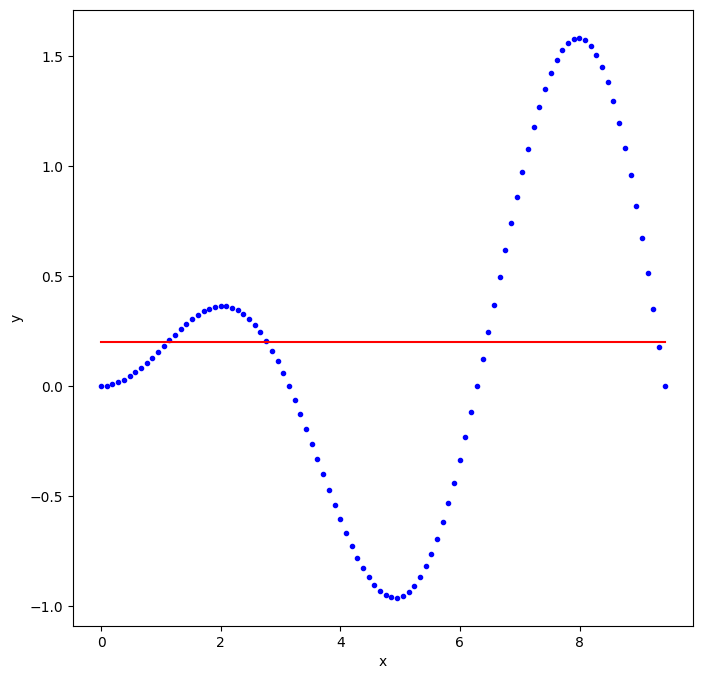

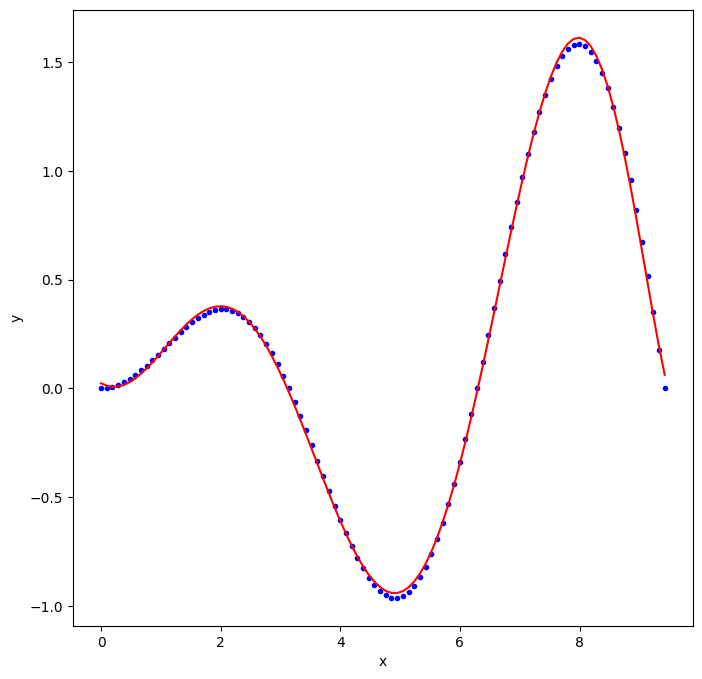

In [6]:
class Model:
    def __init__(self):
        self.feature = None
        pass

    def get_feature(self, x, p = 1):
        x = x.reshape(-1, 1)
        self.feature = np.column_stack([x ** j for j in range(p)])
    

    def find_weight(self, y):
        weight = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ y
        return weight
    
    def predict(self, weight, feature_matrix):
        f_hat = feature_matrix @ weight
        return f_hat
    
    def cal_loss(self, f_hat, y):
        residual = y - f_hat
        loss = (1 / (2 * len(y))) * (residual.T @ residual)
        return float(loss)
    
    def train(self, x , y, p):
        self.get_feature(x,  p)
        weight = self.find_weight(y)
        predict = self.predict(weight, self.feature)
        loss = self.cal_loss(predict, y)
        return predict, loss

model = Model()
y_hat , loss = model.train(x, y, p = 1)
y_hat_2 , loss2_2 = model.train(x, y, p = 8)

plot.plot_point(x, y, y_hat)
plot.plot_point(x, y, y_hat_2)

다음 학습은 최소제곱해를 통해 기울기를 찾았는데, 이는 비선형적 곡선이 더 복잡해지는경우, 데이터의 분포가 더 복잡한경우 굉장히 불리하다. 따라서 가중치에 대해서 좀더 자세하게 다루도록 하겠다.